# Pandas Data Manipulation

In [1]:
import pandas as pd
%matplotlib inline

## Tidy data with Pandas

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

####  `melt`: 欄位名變成值

- **id_vars (key)**: 識別 record 的最小單位的變數 (或變數的組合) => 不動
- **value_vars (measure_var)**: 要折下來的欄位們 (default will use all non id_vars variables)
- **var_name**: 舊欄位折下來後
- **value_name**: 舊欄位的值疊成單一欄位
- **col_level**: If columns are a MultiIndex then use this level to melt

#### `pivot_table` (cast): 值變成欄位名

- **index (key)**: 識別 record 的最小單位的變數 (或變數的組合)
    - 如果是唯一的 => 直接填值
    - 不是唯一 => 需要 `aggfunc`
- **columns (variables)**: 作為 *新變數* 的欄位
- **values**: 作為 *值* 的欄位

**Tools for reshaping dataframe:**

| Packages     | to long | to wide                        |
|--------------|---------|--------------------------------|
| **tidyr**    | gather  | spread                         |
| reshape2     | melt    | dcast                          |
| **pandas**   | melt    | unstsack / pivot_table / pivot |
| spreadsheets | unpivot | pivot                          |
| databases    | fold    | unfold                         |

## Long data (Unpivot): 欄位名變成值

Pandas methods:

```py
df3.melt(id_vars=['first', 'last'], var_name='variable', value_name='value)
```

- **index (key)**: 識別 record 的最小單位的變數 (或變數的組合)
    - 如果是唯一的 => 直接填值
    - 不是唯一 => 需要 `aggfunc`
- **columns (variables)**: 作為 *新變數* 的欄位
- **values**: 作為 *值* 的欄位

https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-melt

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png" width="640">

#### 範例資料：Minisoda 交通死亡數

In [2]:
traffic = pd.read_csv('http://bit.ly/mn-traffic')
traffic.head()

,County,Twin_Cities,Pres_Election,Public_Transport(%),Travel_Time,Population,2012,2013,2014,2015,2016
0,Hennepin,Yes,Clinton,7.2,23.2,1237604,33,42,34,33,45
1,Dakota,Yes,Clinton,3.3,24.0,418432,19,19,10,11,28
2,Anoka,Yes,Trump,3.4,28.2,348652,25,12,16,11,20
3,St. Louis,No,Clinton,2.4,19.5,199744,11,19,8,16,19
4,Ramsey,Yes,Clinton,6.4,23.6,540653,19,12,12,18,15


- **Twin_Cities**: 是否為 Twin Cities (Minneapolis and St. Paul are frequently)
- **Pres_Election**: 該區 2016 美國總統優勢候選人
- **Public_Transport(%)**: 大眾運輸搭乘率
- **Travel_Time**: 平均通勤時間
- **2012 - 2016**: 交通死亡數

In [3]:
traffic_melted = traffic.melt(
    id_vars=['County', 'Twin_Cities', 'Pres_Election', 'Public_Transport(%)',
             'Travel_Time', 'Population'],
    value_vars=['2016', '2015', '2014', '2013', '2012'],
    value_name='Fatalities',
    var_name=['Year']
)
traffic_melted.loc[traffic_melted.County == 'Hennepin'].head()

,County,Twin_Cities,Pres_Election,Public_Transport(%),Travel_Time,Population,Year,Fatalities
0,Hennepin,Yes,Clinton,7.2,23.2,1237604,2016,45
10,Hennepin,Yes,Clinton,7.2,23.2,1237604,2015,33
20,Hennepin,Yes,Clinton,7.2,23.2,1237604,2014,34
30,Hennepin,Yes,Clinton,7.2,23.2,1237604,2013,42
40,Hennepin,Yes,Clinton,7.2,23.2,1237604,2012,33


![](img/pandas-melt.png)

## Wide data (Pivot): 值變成欄位名

> Not tidy data. 通常用在表格呈現或 Pandas 畫圖


Pandas methods:

- `unstack()`: for multiindex

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_unstack_0.png" width="640">

- `pivot()`:
    - doesn't accept a list for index (key).
    - provides general purpose pivoting with various data types (strings, numerics, etc.)
- `pivot_table()`
    - supports using __multiple columns__ for the index (key).
    - you can give `pivot_table` a __list of aggregation functions__ using keyword argument `aggfunc`.
    - the default `aggfunc` is `numpy.mean`.
- Internally, both of them are using `reset_index()`/`stack()`/`unstack()` to do the job.

Args for `pivot` and `pivot_table`:

- **index (key)**: 識別 record 的最小單位的變數 (或變數的組合)
    - 如果是唯一的 => 直接填值
    - 不是唯一 => 需要 `aggfunc` 的參數
- **columns (variables)**: 作為 *新變數* 的欄位
- **values**: 作為 *值* 的欄位

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png" width="640">

### Group and summarize

#### Twin_Cities 和非 Twin_Cities 每年的交通死亡數 (Fatalities) 是否有差異？

In [4]:
traffic_melted.head()

,County,Twin_Cities,Pres_Election,Public_Transport(%),Travel_Time,Population,Year,Fatalities
0,Hennepin,Yes,Clinton,7.2,23.2,1237604,2016,45
1,Dakota,Yes,Clinton,3.3,24.0,418432,2016,28
2,Anoka,Yes,Trump,3.4,28.2,348652,2016,20
3,St. Louis,No,Clinton,2.4,19.5,199744,2016,19
4,Ramsey,Yes,Clinton,6.4,23.6,540653,2016,15


In [5]:
traffic_melted.groupby(['Twin_Cities', 'Year'])['Fatalities'].sum()

Twin_Cities  Year
No           2012     37
             2013     46
             2014     29
             2015     44
             2016     60
Yes          2012    104
             2013     95
             2014     80
             2015     85
             2016    121
Name: Fatalities, dtype: int64

In [6]:
traffic_melted.groupby(['Twin_Cities', 'Year'])['Fatalities'].sum().unstack('Year')

Year,2012,2013,2014,2015,2016
Twin_Cities,,,,,
No,37,46,29,44,60
Yes,104,95,80,85,121


#### Titanic

In [7]:
titanic = pd.read_csv('http://bit.ly/titanicdata')
titanic['survived'] = titanic.survived.astype(bool)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 姓名、性別、年齡
- survived: 是否生還
- pclass: 艙等
- cabin: 房間號碼
- embarlked: 登船港口
- sibsp: 兄弟姊妹＋老婆丈夫數量(sibsp)
- parch: 父母小孩的數量

#### 不同艙等各有多少人？

In [8]:
titanic.groupby('pclass').size()

pclass
1    216
2    184
3    491
dtype: int64

#### 不同艙等的生還/死亡率？

In [9]:
titanic.groupby('pclass').survived.value_counts()

pclass  survived
1       True        136
        False        80
2       False        97
        True         87
3       False       372
        True        119
Name: survived, dtype: int64

In [10]:
# the same
titanic.groupby(['pclass', 'survived']).size()

pclass  survived
1       False        80
        True        136
2       False        97
        True         87
3       False       372
        True        119
dtype: int64

In [11]:
titanic.groupby('pclass').survived.value_counts().unstack()

survived,False,True
pclass,,
1,80,136
2,97,87
3,372,119


In [12]:
titanic.groupby('pclass').survived.value_counts(normalize=True).unstack()

survived,False,True
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


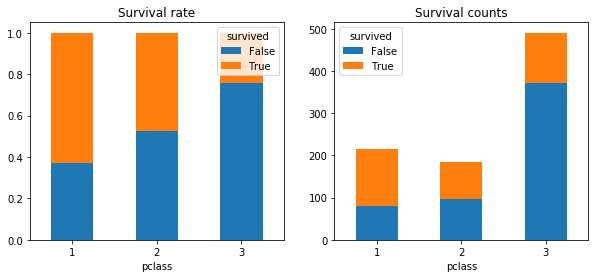

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
titanic.groupby('pclass').survived.value_counts(normalize=True).unstack().plot.bar(
    ax=axes[0], stacked=True, rot=0, title='Survival rate')
titanic.groupby('pclass').survived.value_counts(normalize=False).unstack().plot.bar(
    ax=axes[1], stacked=True, rot=0, title='Survival counts')

#### 小結

- **`value_counts()`** (Series method)
    - Compute frequencies of values in a Series. (Returns named series)
- **`size()`** (Series, DataFrame, GroupBy method)
    - Compute number of elements in this object.
- **`count()`** (Series, DataFrame, GroupBy method)
    - Compute (groups') count of __valid values__

### pivot() / pivot_table()

#### 範例資料：各地銷售額

In [13]:
sales_df = pd.DataFrame({
    'year': ['2016', '2016', '2015', '2014', '2013'],
    'country':['uk', 'usa', 'fr','fr','uk'],
    'sales': [10, 21, 20, 10,12],
    'rep': ['john', 'john', 'claire', 'kyle','kyle']
})
sales_df.head()

,year,country,sales,rep
0,2016,uk,10,john
1,2016,usa,21,john
2,2015,fr,20,claire
3,2014,fr,10,kyle
4,2013,uk,12,kyle


In [14]:
# pivot_table() 可處理 numerical, string 等資料欄位
sales_df.pivot(index='country', columns='year',
               values=['rep','sales'])

rep                     sales               
year     2013  2014    2015  2016  2013 2014 2015 2016
country                                               
fr        NaN  kyle  claire   NaN   NaN   10   20  NaN
uk       kyle   NaN     NaN  john    12  NaN  NaN   10
usa       NaN   NaN     NaN  john   NaN  NaN  NaN   21

In [15]:
# pivot_table() 只處理 numerical 資料欄位
sales_df.pivot_table(index='country', columns='year',
                     values=['rep','sales']) # only sales is pivoted

sales                  
year     2013  2014  2015  2016
country                        
fr        NaN  10.0  20.0   NaN
uk       12.0   NaN   NaN  10.0
usa       NaN   NaN   NaN  21.0

In [16]:
# DataError: No numeric types to aggregate
sales_df.pivot_table(index='country', columns='year',
                     values=['rep']) # 硬塞 string 會出錯

DataError: No numeric types to aggregate

In [17]:
# 手動 set_index() + unstack() 連續技
sales_df.set_index(['country', 'year']).unstack('year')

sales                     rep                    
year     2013  2014  2015  2016  2013  2014    2015  2016
country                                                  
fr        NaN  10.0  20.0   NaN   NaN  kyle  claire   NaN
uk       12.0   NaN   NaN  10.0  kyle   NaN     NaN  john
usa       NaN   NaN   NaN  21.0   NaN   NaN     NaN  john